In [21]:
import numpy as np
import matplotlib.pyplot as plt
# n = 100
# n_zeros = [1]*(n+1)
# n_zeros[0] = 0
# for i in range(1,n+1):
#     zero_i = (i)//10 if (i)%10==0 else 0
#     n_zeros[i] = n_zeros[i-1] + zero_i
# # print(n_zeros[-1])


In [65]:
def check_mult_5(n):
    m = n
    fives = 0
    while m%5==0 and m:
        fives += 1
        m = m//5
    return fives
    
def get_trailing_zeros(n):
    zeros = 0 
    for i in range(n):
        zeros += check_mult_5(i)
    
    
def trailingZeroes(n: int) -> int:
    power = 5
    zeros = 0
    while power <= n:
        zeros += n//power
        power = power*5
    return zeros

In [74]:
get_trailing_zeros(100)

In [81]:
a = {(1,2) : 2}
a[(1,3)] = 3
a

{(1, 2): 2, (1, 3): 3}

In [2]:
import ptemcee

In [3]:
# mu1 = [1, 1], mu2 = [-1, -1]
mu1 = np.ones(2)
mu2 = -np.ones(2)

# Width of 0.1 in each dimension
sigma1inv = np.diag([100.0, 100.0])
sigma2inv = np.diag([100.0, 100.0])

def logl(x):
    dx1 = x - mu1
    dx2 = x - mu2

    return np.logaddexp(-np.dot(dx1, np.dot(sigma1inv, dx1))/2.0,
                        -np.dot(dx2, np.dot(sigma2inv, dx2))/2.0)

# Use a flat prior
def logp(x):
    return 0.0

In [5]:
ptemcee.Sampler?

Init signature:
ptemcee.Sampler(
    nwalkers,
    ndim,
    logl,
    logp,
    logl_args=NOTHING,
    logp_args=NOTHING,
    logl_kwargs=NOTHING,
    logp_kwargs=NOTHING,
    betas=None,
    adaptive=False,
    adaptation_lag=10000,
    adaptation_time=100,
    scale_factor=2,
    mapper=<class 'map'>,
) -> None
Docstring:      <no docstring>
Init docstring: Method generated by attrs for class Sampler.
File:           ~/conda/myenv/lib/python3.9/site-packages/ptemcee/sampler.py
Type:           type
Subclasses:     


In [58]:
ntemps = 10
nwalkers = 10
ndim = 2
N = 1000
sampler = ptemcee.Sampler(nwalkers, ndim, logl, logp, betas= ptemcee.make_ladder(ndim, ntemps, Tmax=250))
# ptemcee.Sampler()

In [59]:
p0 = np.random.uniform(low=-1.0, high=1.0, size=(ntemps, nwalkers, ndim))
chain = sampler.chain(p0)

In [60]:
jr, sr = chain.run(N)

In [45]:
chain.x.shape

(1010, 20, 100, 2)

In [46]:
jr.shape, sr.shape, p0.shape

((20, 100), (19,), (20, 100, 2))

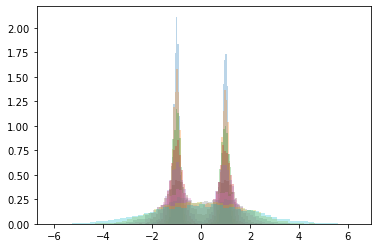

In [62]:
for i in range(ntemps):
    plt.hist(chain.x[:,i,:,0].flatten(), density=True,bins=50,alpha=0.3);

In [ ]:
# mu1 = [1, 1], mu2 = [-1, -1]
mu1 = np.ones(2)
mu2 = -np.ones(2)

# Width of 0.1 in each dimension
sigma1inv = np.diag([100.0, 100.0])
sigma2inv = np.diag([100.0, 100.0])

def logl(x):
    dx1 = x - mu1
    dx2 = x - mu2

    return np.logaddexp(-np.dot(dx1, np.dot(sigma1inv, dx1))/2.0,
                        -np.dot(dx2, np.dot(sigma2inv, dx2))/2.0)

# Use a flat prior
def logp(x):
    return 0.0

In [127]:
p0[0].shape

(100, 2)

In [134]:
import reddemcee

ndim, nwalkers = 2, 100
ntemps = 5
ivar = 1. / np.random.rand(ndim)
p0 = list(np.random.randn(ntemps, nwalkers, ndim))

sampler = reddemcee.PTSampler(nwalkers, ndim, logl, logp)
sampler.run_mcmc(p0.copy(), 1000)

100%|██████████| 1000/1000 [00:09<00:00, 104.17it/s]


[State([[ 1.09990538  1.03831189]
  [-0.99491639 -0.93791472]
  [-0.8989389  -1.01807344]
  [-0.97718389 -1.17876087]
  [ 1.08425559  1.02462904]
  [-1.12290045 -0.94325162]
  [ 0.91796928  1.13075688]
  [ 0.98792364  1.060288  ]
  [-0.96318654 -0.98129798]
  [-1.0044699  -1.02391227]
  [ 0.80815939  1.08012754]
  [ 0.88482881  1.16540178]
  [-0.97291146 -1.01453569]
  [ 0.91930867  1.22966045]
  [-0.94724503 -0.97819497]
  [ 1.17563548  1.02082528]
  [ 1.10991419  0.98142996]
  [ 1.03179216  0.90233926]
  [ 1.04766416  1.16720376]
  [-1.1309563  -0.99944485]
  [ 1.23278938  0.93734272]
  [ 1.06461961  1.0554419 ]
  [ 1.01122645  0.95734122]
  [ 0.89751584  0.85808148]
  [-1.15315804 -1.16127199]
  [ 0.90754394  0.93438397]
  [-0.87860409 -1.01299086]
  [-0.9897216  -0.98538567]
  [ 0.99308348  1.00985038]
  [ 0.91322796  1.08878689]
  [ 0.90311656  0.85653775]
  [ 0.98939337  0.87043933]
  [ 1.01113367  1.04021343]
  [-1.15293677 -0.98679408]
  [-1.04588724 -0.87210734]
  [-1.08059894

In [146]:
sampler.betas, reddemcee.set_temp_ladder(ntemps, ndim)

(array([1.00000000e+00, 1.53037032e-01, 2.39231196e-02, 3.36029479e-03,
        4.16493128e-04]),
 array([1.00000000e+00, 1.42857143e-01, 2.04081633e-02, 2.91545190e-03,
        4.16493128e-04]))

In [91]:
sampler.sampler[0].get_chain().shape
sample = np.array([ensemble_sampler.get_chain() for ensemble_sampler in  sampler.sampler])
sample.shape

(5, 2000, 100, 2)

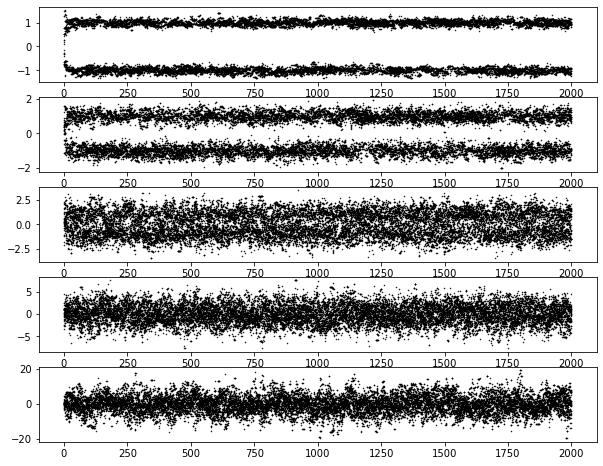

In [135]:
# plt.plot(sample[0,:,:,0].flatten())
fig, axs = plt.subplots(5,1, figsize=(10,8))
for i in range(5):
    for j in range(10):
        axs[i].plot(sample[i,:,j,1], '.', markersize=1, color="black")

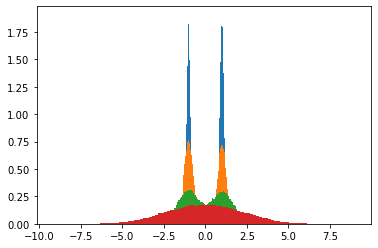

In [138]:
plt.hist(sample[0,:,:,0].flatten(),bins=100, density=True);
plt.hist(sample[1,:,:,0].flatten(),bins=100, density=True);
plt.hist(sample[2,:,:,0].flatten(),bins=100, density=True);
plt.hist(sample[3,:,:,0].flatten(),bins=100, density=True);
# plt.hist(sample[4,:,:,0].flatten(),bins=100, density=True);
